*This study was conducted for skills demonstration purposes only*

# **Forecasting the UK Construction Sector with Macroeconomic Indicators**
# Section 4. Exploratory Data Analysis (EDA)

In the previous sections, all necessary data was collected, cleaned, formatted, normalized, standardized and saved as df_final.csv, df_normalized_final.csv and df_standardized_final.csv. All outliers were processed. In this section final datasets will be analyzed and investigated for dependencies between indicators with data visualization methods.

### 1. Tools and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta
import seaborn as sns

### 2.  Auxiliary Functions

In [2]:
def create_subplot_trends(df, plots_dict, subtitle):
    """
    Creates subplots for multiple sets of time series data with key event markers.
    
    Parameters:
    - df: DataFrame with datetime index and event marker columns.
    - plots_dict: Dictionary where keys are subplot titles and values are [col_list, label_list, color_list].
    - suptitle: Title for the entire figure.
    """
    # Ensure datetime index
    df.index = pd.to_datetime(df.index)

    # Detect event dates
    def get_event_date(column, first=True):
        try:
            idx = df[df[column] == 1].index
            return idx[0] if first else idx[-1]
        except IndexError:
            return None

    first_lockdown = get_event_date('COVID_Lockdown')
    start_crisis = get_event_date('financial_crisis_2008', first=True)
    end_crisis = get_event_date('financial_crisis_2008', first=False)
    brexit = get_event_date('brexit_referendum_2016')

    events = [
        (first_lockdown, "COVID Lockdown"),
        (start_crisis, "2008 Crisis Start"),
        (end_crisis, "2008 Crisis End"),
        (brexit, "Brexit Referendum")
    ]

    # Setup figure and subplots
    n_plots = len(plots_dict)
    fig, axes = plt.subplots(n_plots, 1, figsize=(14, 5 * n_plots), sharex=True)
    if n_plots == 1:
        axes = [axes]

    for ax, (plot_title, (col_list, label_list, color_list)) in zip(axes, plots_dict.items()):
        # Plot lines
        for col, label, color in zip(col_list, label_list, color_list):
            ax.plot(df.index, df[col], label=label, color=color)

        # Add event markers
        ymin, ymax = ax.get_ylim()
        gap = timedelta(days=150)
        for date, label in events:
            if date:
                ax.axvline(x=date, color='red', linestyle='--', linewidth=1)
                ax.text(date - gap, (ymin + ymax) / 2, label, color='red',
                        rotation=90, verticalalignment='bottom', horizontalalignment='left', fontsize=10)

        # Styling
        ax.set_title(plot_title, fontsize=14)
        ax.set_ylabel('Normalized')
        ax.grid(True)
        ax.legend()
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.tick_params(axis='x', rotation=45)

    axes[-1].set_xlabel("Date")
    fig.suptitle(subtitle, fontsize=16, y=0.990)
    plt.tight_layout()
    plt.show()


### 2. Loading data

In [3]:
#Reading data
df = pd.read_csv('df_final.csv').set_index('Date')
df_normalized = pd.read_csv('df_normalized_final.csv').set_index('Date')
df_standardized = pd.read_csv('df_standardized_final.csv').set_index('Date')

In [4]:
df

,CPIH,"GDP, £m","Employment rate, %","BoE Rate, %",GBP/EUR,GBP/USD,"Business Investment, % change","Govt Expenditure, £m","Construction output, £m","Construction Material Price Index, 2015 = 100",...,"New Contracts - Infrastructure, £m","New contracts - Other, £m","New Contracts - Private Industrial, £m","New Contracts - Private Commercial, £m","New contracts - All Construction, £m",COVID_Lockdown,HS2_contracts,Commercial_Construction_Boom_2006,financial_crisis_2008,brexit_referendum_2016
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,78.3,167567.33,73.2,4.7500,1.4331,1.8764,-0.17,48114,14699.33,70.53,...,545.00,866.00,412.67,1908.00,5216.33,0,0,0,0,0
2005-02-01,78.5,167567.33,73.1,4.7500,1.4499,1.8871,-0.17,46543,14699.33,70.53,...,545.00,866.00,412.67,1908.00,5216.33,0,0,0,0,0
2005-03-01,78.8,167567.33,72.9,4.7500,1.4440,1.9078,-0.17,46066,14699.33,70.53,...,545.00,866.00,412.67,1908.00,5216.33,0,0,0,0,0
2005-04-01,79.1,168968.67,72.9,4.7500,1.4652,1.8960,18.53,49028,14592.67,70.53,...,552.67,906.00,548.33,1860.33,5508.33,0,0,0,0,0
2005-05-01,79.4,168968.67,72.9,4.7500,1.4611,1.8538,18.53,42293,14592.67,70.53,...,552.67,906.00,548.33,1860.33,5508.33,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-01,133.5,213891.67,74.9,5.0000,1.1903,1.3217,0.73,106042,17692.00,153.00,...,728.33,443.00,336.00,987.00,3184.33,0,0,0,0,0
2024-10-01,134.3,214095.67,74.9,5.0000,1.1972,1.3045,-0.63,108156,17684.00,152.20,...,505.33,456.67,271.67,992.33,3066.67,0,0,0,0,0
2024-11-01,134.6,214095.67,75.0,4.7976,1.1998,1.2750,-0.63,102631,17795.00,152.90,...,505.33,456.67,271.67,992.33,3066.67,0,0,0,0,0


In [5]:
df.columns

Index(['CPIH', 'GDP, £m', 'Employment rate, %', 'BoE Rate, %', 'GBP/EUR',
       'GBP/USD', 'Business Investment, % change', 'Govt Expenditure, £m',
       'Construction output, £m',
       'Construction Material Price Index, 2015 = 100',
       'Small construction companies', 'Medium construction companies',
       'Large construction companies', 'Number of all construction companies',
       'Employees - Small construction companies',
       'Employees - Medium construction companies',
       'Employees - Large construction companies',
       'Employees - All construction companies',
       'New Contracts - Public Housing, £m',
       'New Contracts - Private Housing, £m',
       'New Contracts - Infrastructure, £m', 'New contracts - Other, £m',
       'New Contracts - Private Industrial, £m',
       'New Contracts - Private Commercial, £m',
       'New contracts - All Construction, £m', 'COVID_Lockdown',
       'HS2_contracts', 'Commercial_Construction_Boom_2006',
       'financial_

In [6]:
df_normalized.columns

Index(['CPIH_normalized', 'GDP, £m_normalized',
       'Employment rate, %_normalized', 'BoE Rate, %_normalized',
       'GBP/EUR_normalized', 'GBP/USD_normalized',
       'Business Investment, % change_normalized',
       'Govt Expenditure, £m_normalized', 'Construction output, £m_normalized',
       'Construction Material Price Index, 2015 = 100_normalized',
       'Small construction companies_normalized',
       'Medium construction companies_normalized',
       'Large construction companies_normalized',
       'Number of all construction companies_normalized',
       'Employees - Small construction companies_normalized',
       'Employees - Medium construction companies_normalized',
       'Employees - Large construction companies_normalized',
       'Employees - All construction companies_normalized',
       'New Contracts - Public Housing, £m_normalized',
       'New Contracts - Private Housing, £m_normalized',
       'New Contracts - Infrastructure, £m_normalized',
       'New 

### 3. Summary Statistics

In [7]:
#df.describe(include='all')

### 4. Correlation Heatmap

For the correlation heatmap the dataset with standartized data 'df_standardized' will be used because it scales all variables to a mean of 0 and standard deviation of 1, ensuring equal contribution regardless of original units (e.g., £m, %, indices). This aligns with Pearson correlation assumptions, providing accurate and comparable linear relationships across diverse columns.

In [8]:
#Check the columns list
df_standardized.columns

Index(['CPIH_standardized', 'GDP, £m_standardized',
       'Employment rate, %_standardized', 'BoE Rate, %_standardized',
       'GBP/EUR_standardized', 'GBP/USD_standardized',
       'Business Investment, % change_standardized',
       'Govt Expenditure, £m_standardized',
       'Construction output, £m_standardized',
       'Construction Material Price Index, 2015 = 100_standardized',
       'Small construction companies_standardized',
       'Medium construction companies_standardized',
       'Large construction companies_standardized',
       'Number of all construction companies_standardized',
       'Employees - Small construction companies_standardized',
       'Employees - Medium construction companies_standardized',
       'Employees - Large construction companies_standardized',
       'Employees - All construction companies_standardized',
       'New Contracts - Public Housing, £m_standardized',
       'New Contracts - Private Housing, £m_standardized',
       'New Contracts

Due to the long list of columns, the heat map will be split into two parts for better visibility: 'Strong Correlations (|r| > 0.5): Macroeconomic vs Construction Indicators' and 'Weak Correlations (|r| <= 0.5): Macroeconomic vs Construction Indicators'.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1. Define column groups
macro_cols = df_standardized.columns[:8]          # 8 macro indicators
construction_cols = df_standardized.columns[8:25] # 17 construction indicators

#2. Compute 8x17 correlation matrix
correlation = pd.DataFrame(index=macro_cols, columns=construction_cols)

for macro in macro_cols:
    for constr in construction_cols:
        correlation.loc[macro, constr] = df_standardized[macro].corr(df_standardized[constr])

correlation = correlation.astype(float)

#3. Clean axis names
correlation.index = [
    name.split(',')[0] if ',' in name else name.split('_standardized')[0]
    for name in correlation.index
]
correlation.columns = [
    'Construction output', 'Constr Material Price Index',
    'Small', 'Medium', 'Large', 'All',
    'in Small firms', 'in Medium firms', 'in Large firms', 'in All firms',
    'Public Housing', 'Private Housing', 'Infrastructure', 'Other',
    'Private Industrial', 'Private Commercial', 'All Construction'
]

#4. Define group info
group_boundaries = [2, 6, 10]
group_ranges = [(0, 2), (2, 6), (6, 10), (10, 17)]
group_colors = ['#F0F0F0', '#E6F0FA', '#E8F5E9', '#FFF3E0']
group_labels = ['Number of Companies', 'Number of Employees', 'Number of New Contracts']
group_label_ranges = [(2, 6), (6, 10), (10, 17)]

#5. Heatmap plotting function
def plot_correlation_heatmap(corr_matrix, title, mask_strong=False):
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(18, 8))

    # Create mask and display matrix
    if mask_strong:
        mask = corr_matrix.abs() >= 0.5
        display_matrix = corr_matrix.where(~mask)
    else:
        display_matrix = corr_matrix.where(corr_matrix.abs() > 0.5)
        mask = None

    # Plot heatmap
    ax = sns.heatmap(
        display_matrix,
        mask=mask,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        center=0,
        cbar_kws={"label": "Correlation"},
        linewidths=0.5,
        linecolor='gray',
        annot_kws={"color": "black"},
        alpha=0.5 if mask_strong else 1.0  # Light color for weak correlations
    )

    # Add vertical group dividers
    for boundary in group_boundaries:
        ax.axvline(x=boundary, color='#555555', linewidth=2)

    # Set background color for x-tick labels
    for i, (start, end) in enumerate(group_ranges):
        for j in range(start, end):
            if j < len(ax.get_xticklabels()):
                ax.get_xticklabels()[j].set_backgroundcolor(group_colors[i])

    # Add group labels above heatmap
    for (start, end), label in zip(group_label_ranges, group_labels):
        x_center = (start + end) / 2
        ax.text(x_center, -0.2, label, ha='center', va='bottom', fontsize=13)

    # Adjust tick spacing and padding
    ax.tick_params(axis='x', pad=5)
    plt.title(title, fontsize=18, pad=60)
    plt.xlabel("Construction Indicators", fontsize=15)
    plt.ylabel("Macroeconomic Indicators", fontsize=15, labelpad=20)
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(fontsize=13)
    plt.tight_layout()
    plt.show()


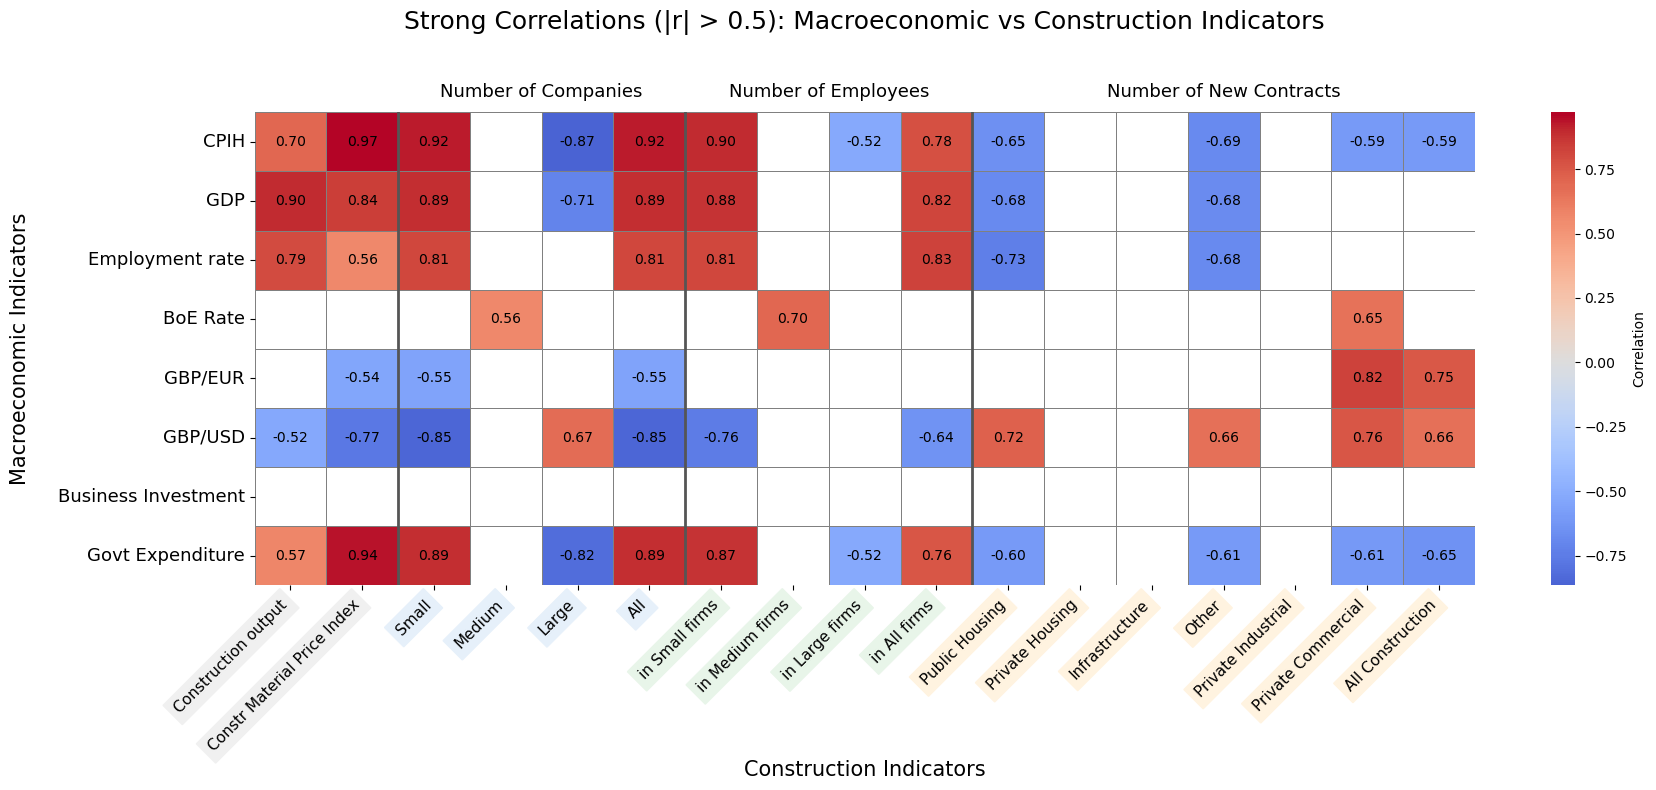

In [10]:
# Plot a heatmap for strong correlations
plot_correlation_heatmap(
    correlation,
    title="Strong Correlations (|r| > 0.5): Macroeconomic vs Construction Indicators",
    mask_strong=False
)

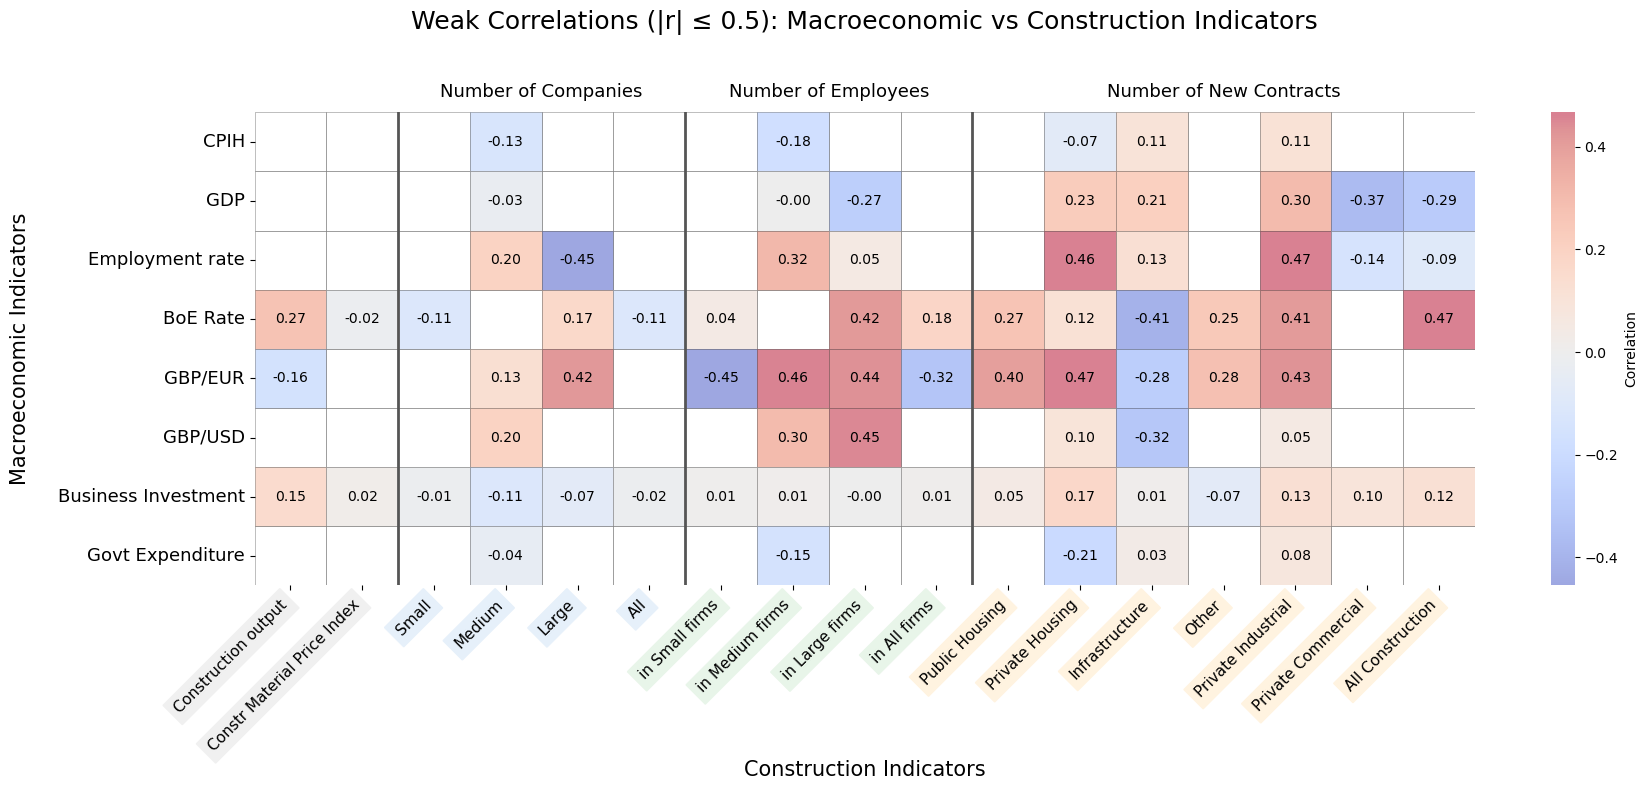

In [11]:
# Plot a heatmap fpr weak correlations
plot_correlation_heatmap(
    correlation,
    title="Weak Correlations (|r| ≤ 0.5): Macroeconomic vs Construction Indicators",
    mask_strong=True
)

### Correlation Insights Table

The following table summarizes key insights from the correlation heatmaps between macroeconomic indicators (CPIH, GDP, Employment rate, BoE Rate, GBP/EUR, GBP/USD, Business Investment, Government Expenditure) and construction sector indicators (2005–2025), highlighting relationships, implications, time-lag effects, and their relevance to the research questions.

| **Construction Indicator Category** | **Key Correlations** | **Insights and Implications** | **Potential Time-Lag Effects** | **Research Implications** |
| --- | --- | --- | --- | --- |
| **Construction Output** | GDP (0.90), Employment rate (0.79), CPIH (0.70), GBP/USD (-0.52) | Strong positive correlations with GDP and Employment rate confirm construction’s cyclical nature. Negative GBP/USD correlation suggests a stronger pound increases material costs, reducing output. | Lagged GDP effects (3–6 months) may amplify correlations, as economic growth drives construction with delays. | GDP and Employment rate will be tested as leading indicators for forecasting output using Granger causality. |
| **Construction Material Price Index** | CPIH (0.97), Govt Expenditure (0.94), GBP/USD (-0.77) | Near-perfect correlation with CPIH and strong link to Govt Expenditure show material prices track inflation and public spending. Negative GBP/USD correlation indicates imported material costs rise with a stronger pound. | Inflation lags (3–12 months) may strengthen price correlations, as material costs adjust gradually. | CPIH and Govt Expenditure will be used in lagged regression to forecast material prices. |
| **Small Firms & Total Employees** | CPIH (0.78–0.92), GDP (0.82–0.89), Employment rate (0.81–0.83), GBP/USD (-0.64–0.85) | Small firms and total employment thrive during economic booms and high inflation, but a stronger pound reduces activity due to cost pressures. | Lagged economic growth (6–12 months) may enhance correlations, as small firms scale with demand. | Small firms’ sensitivity to economic cycles will be analyzed for sub-sector forecasting. |
| **Medium & Large Firms/Employees** | CPIH (-0.13 to -0.87), GDP (-0.03 to -0.71), BoE Rate (0.42–0.70) | Weak/negative correlations with CPIH and GDP suggest larger firms face cost pressures or consolidation during economic growth. Unexpected positive BoE Rate correlation may reflect anticipatory investments. | Positive BoE Rate correlations may turn negative with lags (3–6 months) as borrowing costs impact larger firms. | Divergent responses of medium/large firms will be investigated using VAR models. |
| **New Contracts (Public Housing, Other, All)** | CPIH (-0.59 to -0.65), GDP (-0.29 to -0.68), Employment rate (-0.09 to -0.73) | Negative correlations indicate high economic growth or inflation delays new projects due to rising costs or capacity constraints. | Lagged GDP/CPIH effects (6–12 months) may reveal positive correlations as projects initiate post-cost stabilization. | Impact of economic shocks (e.g., Brexit) on contract delays will be analyzed. |
| **New Contracts (Private Commercial)** | GBP/EUR (0.82), GBP/USD (0.76), BoE Rate (0.65) | Strong positive correlations with exchange rates and BoE Rate suggest commercial projects benefit from a stronger pound (foreign investment) and higher rates (anticipatory financing). | Lagged BoE Rate effects (3–6 months) may show negative correlations as borrowing costs deter projects. | Foreign investment’s role in commercial contracts will be analyzed using regression. |
| **New Contracts (Infrastructure, Private Industrial)** | CPIH (0.11), GDP (0.21–0.30), BoE Rate (-0.41 to 0.41) | Weak correlations suggest these sub-sectors are less sensitive to economic cycles, possibly due to long-term contracts or stable demand. | Minimal lag effects expected, but cross-correlation analysis can confirm if weak relationships strengthen over time. | Infrastructure’s stability will be analyzed. |


The correlation heatmaps reveals strong ties between construction output, small firms, and macroeconomic indicators (GDP, CPIH, Employment rate), confirming the sector’s cyclical nature. Material prices track inflation and public spending. Medium and large firms and new contracts show unexpected patterns, probably due to time lags (3–12 months). These insights directly address research questions on correlations, predictive modeling, time lags, sub-sector impacts, and black swan events.

### 5. Analyzing Individual Indicators Patterns Using Visualization

#### 5.1 UK Economic Trends with Key Events

Before analyzing construction indicators, let's familiarize yourself with UK macroeconomic trends and key events.

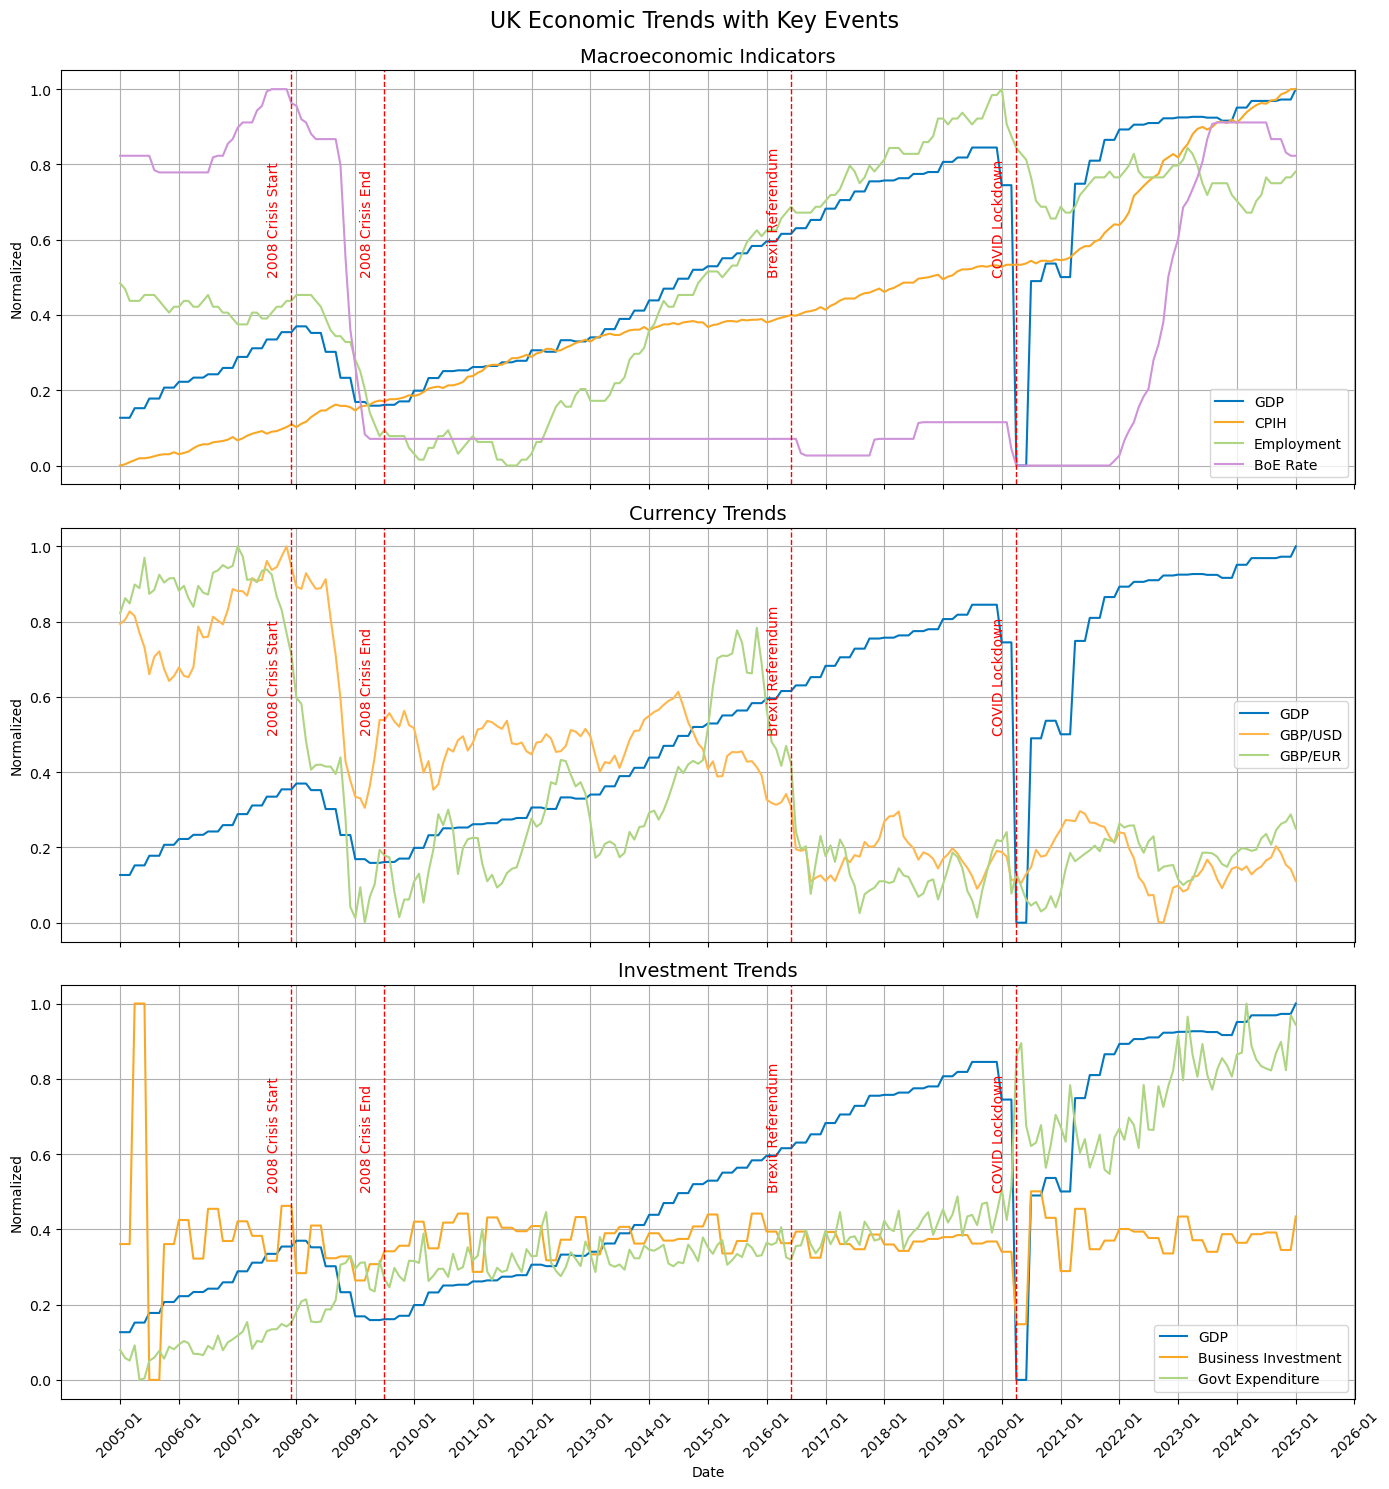

In [12]:
# Creating subplots for UK Economic Trends with Key Events using auxiliary function
plots_dict = {
    "Macroeconomic Indicators": [
        ['GDP, £m_normalized', 'CPIH_normalized', 'Employment rate, %_normalized', 'BoE Rate, %_normalized'],
        ['GDP', 'CPIH', 'Employment', 'BoE Rate'],
        ['#0277bd', '#f9a825', '#aed581', '#ce93d8']
    ],
    "Currency Trends": [
        ['GDP, £m_normalized', 'GBP/USD_normalized', 'GBP/EUR_normalized'],
        ['GDP', 'GBP/USD', 'GBP/EUR'],
        ['#0277bd', '#ffb74d', '#aed581']
    ],
    "Investment Trends": [
        ['GDP, £m_normalized', 'Business Investment, % change_normalized', 'Govt Expenditure, £m_normalized'],
        ['GDP', 'Business Investment', 'Govt Expenditure'],
        ['#0277bd', '#f9a825', '#aed581']
    ]
}

create_subplot_trends(df_normalized, plots_dict, subtitle="UK Economic Trends with Key Events")

- The 2008 financial crisis and the COVID-19 lockdown caused significant declines in UK GDP, as seen across all three subplots. While the 2008 recovery was gradual, GDP rebounded quickly after the initial COVID shock, reflecting strong short-term resilience.

- CPIH remained relatively stable throughout most major events, suggesting inflation was not immediately driven by these crises, though longer-term pressures may have developed.

- The employment rate dropped sharply during the COVID-19 period, revealing the labor market’s sensitivity to abrupt shocks. However, its movement during the 2008 crisis was more gradual.

- BoE interest rates were slashed during both the 2008 and COVID-19 periods, highlighting the central bank’s use of monetary policy to stabilize the economy.

- Currency depreciation following the Brexit referendum and during the COVID crisis indicates reduced investor confidence. This has implications for import costs and inflation over time.

- Business investment showed a consistent pattern of decline during crisis periods, while government expenditure increased most significantly in response to COVID-19 — underscoring the state’s role in stabilizing the economy.

- Overall, the data reveal a pattern of economic vulnerability to shocks, followed by varying recovery speeds depending on the nature of the event and the policy response.

#### 5.2 Trends in UK Construction Output and Materials Prices

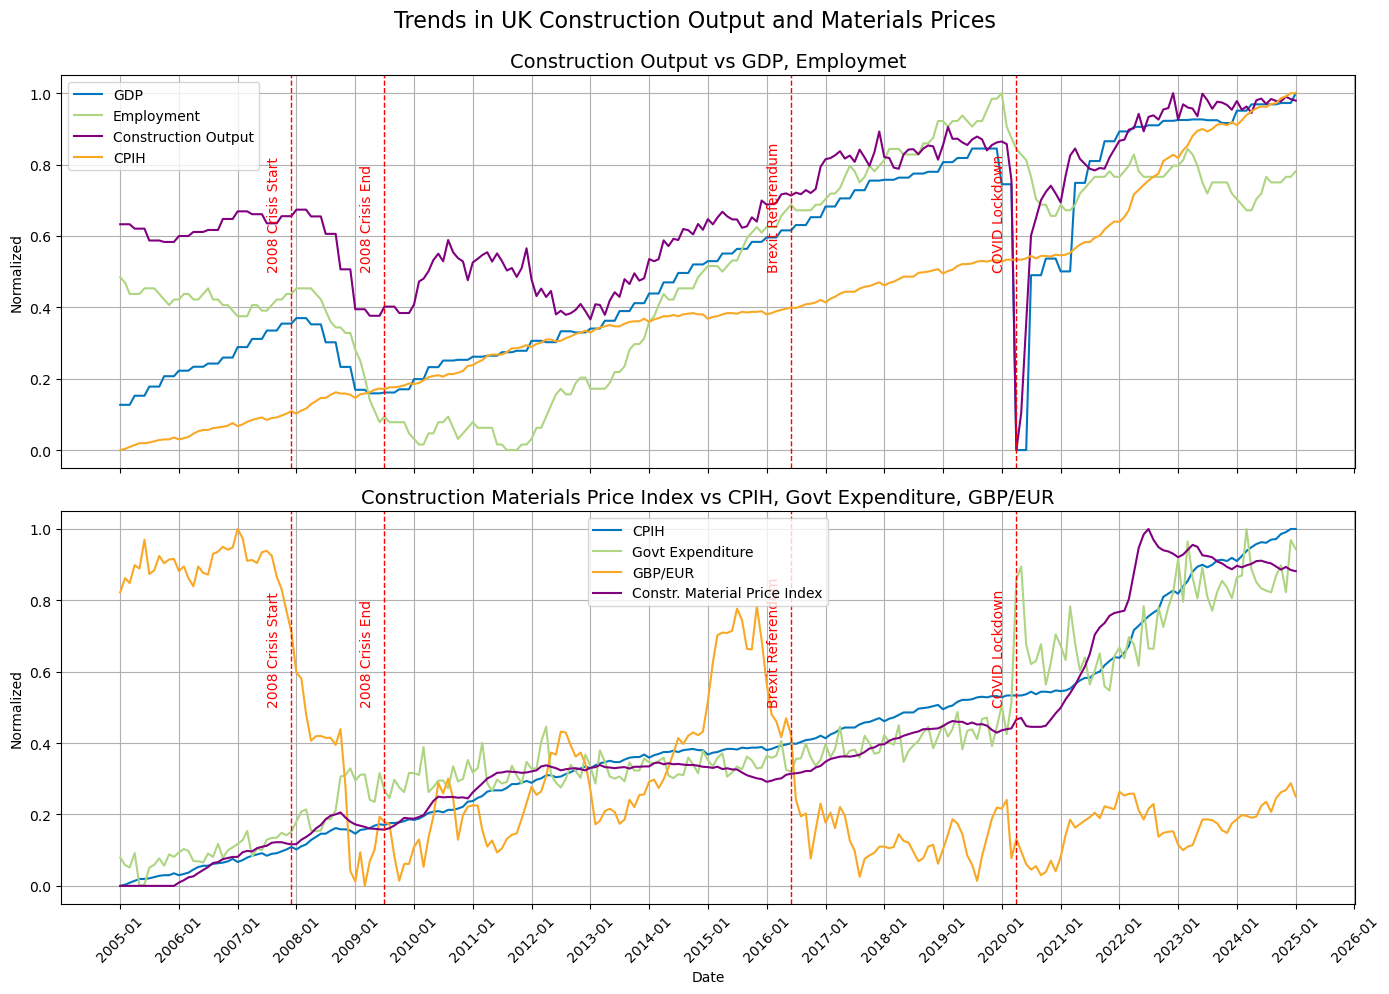

In [13]:
# Creating subplots for Trends in UK Construction Output and Materials Prices using auxiliary function
plots_dict = {
    "Construction Output vs GDP, Employmet": 
    [
        ['GDP, £m_normalized', 'Employment rate, %_normalized', 'Construction output, £m_normalized', 'CPIH_normalized'], 
        ['GDP', 'Employment', 'Construction Output', 'CPIH'],
        ['#0277bd', '#aed581', 'purple', '#f9a825']
    ],
        "Construction Materials Price Index vs CPIH, Govt Expenditure, GBP/EUR": 
    [
        ['CPIH_normalized', 'Govt Expenditure, £m_normalized', 'GBP/EUR_normalized', 'Construction Material Price Index, 2015 = 100_normalized'], 
        ['CPIH', 'Govt Expenditure', 'GBP/EUR', 'Constr. Material Price Index'],
        ['#0277bd', '#aed581', '#f9a825', 'purple']
    ]
}

create_subplot_trends(df_normalized, plots_dict, subtitle="Trends in UK Construction Output and Materials Prices")

- Construction Output and GDP
  Convergence: Still evident — both plummet during 2008 crisis and COVID lockdown.
  Divergence: GDP lags slightly behind construction output post-2021.

- Material Prices and Currency (GBP/EUR)
  Convergence: Sharp material price increase post-Brexit, aligned with GBP depreciation.
  Divergence: In the 2022–2025 period, GBP/EUR stabilizes, but material prices remain elevated, implying additional inflationary pressures or supply constraints.

- Employment and Construction Output
  Convergence: Both fall during crises.
  Divergence: Post-2020, construction output recovers faster than employment, again suggesting labor market rigidities or mismatch.

- Govt Expenditure and Construction Output
  Convergence: Especially around 2020, surge in public spending seems followed by construction output rebound.
  Implication: Fiscal stimulus played a direct role in sectoral recovery.

- Interest Rates and Construction Output
  Historically aligned — output tends to increase after interest rate cuts, particularly visible after 2008 and 2020.

### Authors

[Alisa Makhonina](https://www.linkedin.com/in/alisa-makhonina-data-science/) Data scientist with over 8 years of experience in construction cost engineering. Structural Engineering graduate.